In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import iplot, init_notebook_mode

In [2]:
# loading as a pandas dataframe
data = pd.read_csv('C:/Users/prono/Desktop/CompleteDataset.csv', low_memory=False)

In [3]:
# importing rpy2 and loading as a r object
import rpy2.robjects as robjects                                                                                                                                                                                                                        
fifa = robjects.r['read.csv']("C:/Users/prono/Desktop/CompleteDataset.csv")

In [4]:
print(robjects.r['summary'](fifa))

       X                    Name            Age       

 Min.   :    0   J. RodrÃ­guez:    7   Min.   :16.00  

 1st Qu.: 4495   J. Valencia  :    7   1st Qu.:21.00  

 Median : 8990   J. Williams  :    7   Median :25.00  

 Mean   : 8990   D. GonzÃ¡lez :    6   Mean   :25.14  

 3rd Qu.:13485   Danilo       :    6   3rd Qu.:28.00  

 Max.   :17980   Felipe       :    6   Max.   :47.00  

                 (Other)      :17942                  

                                             Photo          Nationality   

 https://cdn.sofifa.org/48/18/players/197083.png:    2   England  : 1630  

 https://cdn.sofifa.org/48/18/players/198113.png:    2   Germany  : 1140  

 https://cdn.sofifa.org/48/18/players/198140.png:    2   Spain    : 1019  

 https://cdn.sofifa.org/48/18/players/198329.png:    2   France   :  978  

 https://cdn.sofifa.org/48/18/players/198584.png:    2   Argentina:  965  

 https://cdn.sofifa.org/48/18/players/198614.png:    2   Brazil   :  812  

 (Other)            

In [5]:
data.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [7]:
#Data Exploration

#no. of players
n_players = data.shape[0]

#no. of features
n_features = data.shape[1] - 1

#no. of players_potential > 70 == 'potentially good players'
n_potential = len(data[data.Potential > 70])

#potential rate
p_rate = (float(n_potential)/(n_players)) * 100

# Print the results
print("Total no. of players: {}".format(n_players))
print("No. of features: {}".format(n_features))
print("No. of potential players: {}".format(n_potential))
print("Potential rate of players: {:.2f}%".format(p_rate))

Total no. of players: 17981
No. of features: 74
No. of potential players: 9467
Potential rate of players: 52.65%


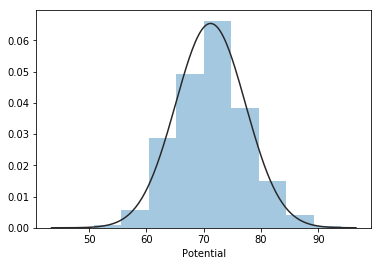

In [8]:
#standard dist of player potential
#TODO update next cell so that it displays 2 std dev above it
import warnings
warnings.filterwarnings('ignore')
#To ignore warnings that come up modules being upgraded
from scipy import stats

sns.distplot(data.Potential, fit=stats.norm, bins=10, kde=False)

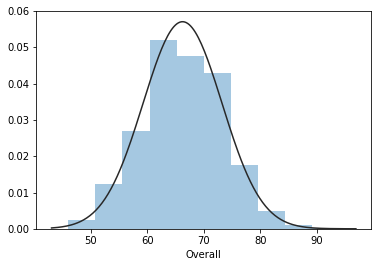

In [9]:
#Normal distribution curve of Overall

sns.distplot(data.Overall, fit=stats.norm, bins=10, kde=False)

In [10]:
# Supporting function for converting string values into numbers for the col of wage and value
def str2num(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    
data['Worth'] = data['Value'].apply(lambda x: str2num(x))
data['Salary'] = data['Wage'].apply(lambda x: str2num(x))

In [11]:
data['Worth'].describe()

count    1.798100e+04
mean     2.385390e+06
std      5.353970e+06
min      0.000000e+00
25%      3.000000e+05
50%      6.750000e+05
75%      2.100000e+06
max      1.230000e+08
Name: Worth, dtype: float64

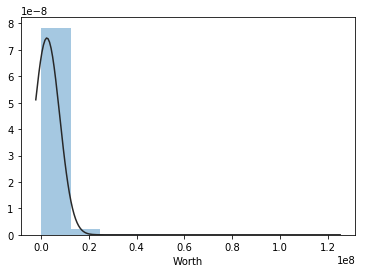

In [12]:
#Normal distribution curve of Value

sns.distplot(data.Worth, fit=stats.norm, bins=10, kde=False)

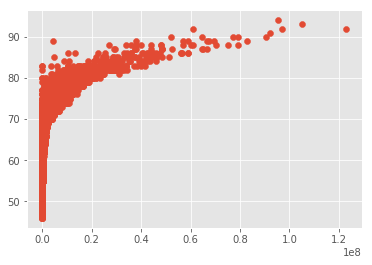

In [13]:
#plotting scatter plot of Worth(Value) vs Overall

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(x='Worth', y='Overall', data=data)
plt.show()

In [14]:
#defining correlation coefficient - shows us that for every 1 unit of x, y increases by ~0.63
import numpy as np
np.corrcoef(x=data.Worth, y=data.Overall)

array([[1.        , 0.62600054],
       [0.62600054, 1.        ]])

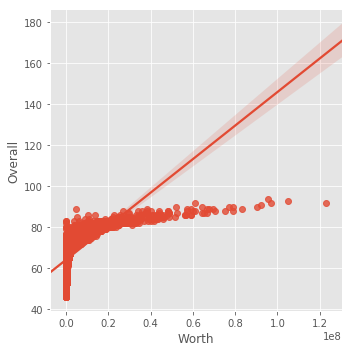

In [15]:
#plotting a Regression line between value and overall
sns.lmplot(x='Worth', y='Overall', data=data)

In [16]:
import statsmodels.api as sm

#X = data.Val
#y = data.Overall

# Note the difference in argument order
#model = sm.OLS(y, X).fit()
model = sm.OLS(data.Overall, data.Worth).fit()
predictions = model.predict(data.Worth) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     4953.
Date:                Mon, 03 Sep 2018   Prob (F-statistic):               0.00
Time:                        10:24:33   Log-Likelihood:                -98828.
No. Observations:               17981   AIC:                         1.977e+05
Df Residuals:                   17980   BIC:                         1.977e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Worth       5.282e-06   7.51e-08     70.374      0.000    5.13e-06    5.43e-06
==============================================================================
Omnibus:                    25612.645   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9684741.362
Skew:                          -8.464   Prob(JB):                         0.00
Kurtosis:                     115.428   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#for loading the rpy2 interface to type in r magic commands 
import rpy2.rinterface
%load_ext rpy2.ipython

# defining subset of datframe for inputs to r interface
Worth = data.Worth
Potential = data.Potential

In [18]:
# pushing python df into r interface as objects
%Rpush Worth Potential

In [19]:
# prints the statistical measure required

# %R print(class(Worth))
# %R print(median(Worth))
# %R sd(Worth)
%R print(mean(Worth))

array([2385389.57788777])

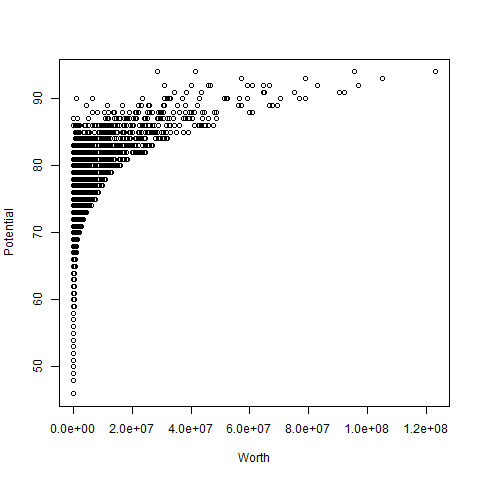

In [20]:
%R plot(Potential~Worth)

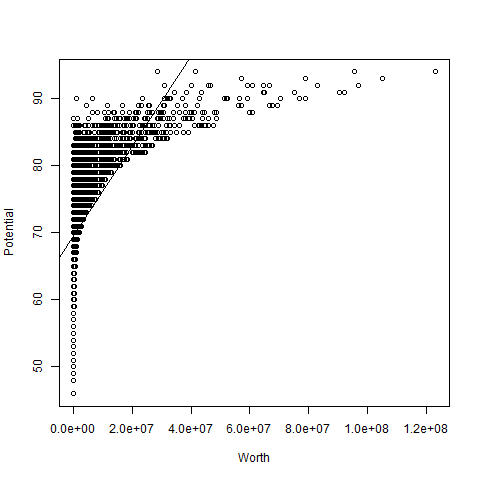

In [21]:
%R plot(Potential~Worth); abline(lm(Potential~Worth))

In [22]:
# gives a summary of the linear regression acc to R
%R summary(lm(Potential~Worth))

R object with classes: ('summary.lm',) mapped to:
<ListVector - Python:0x000002157CBF8C08 / R:0x00000215757F2C90>
[Vector, Formula, FloatVector, Matrix, ..., FloatVector, FloatVector, FloatVector, Matrix]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('lm',) mapped to:
<Vector - Python:0x000002157CC66288 / R:0x0000021576B100D8>
[RObject, Vector]
  terms: <class 'rpy2.robjects.Formula'>
  R object with classes: ('terms', 'formula') mapped to:
<Formula - Python:0x000002157C3495C8 / R:0x0000021576CCD4C8>
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002157CBE2B88 / R:0x0000021578B0C9D8>
[-39.601723, -46.969184, -58.033847, -42.607112, ..., -23.591984, -8.632199, -5.632199, -5.625497]
  coefficients: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x000002157CBE2988 / R:0x0000021578C64E08>
[69.591984, 0.000001, 0.040296, 0.000000, 1727.035617, 97.492265, 0.000000, 0.000000]
...
  sigma: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002157CBE2308 / R:0x0000021577604FB0>
[0.345831]
  df: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002157CBE2788 / R:0x00000215776021C8>
[0.345795]
  r.squared: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002157CBE2608 / R:0x0000021577650110>
[9504.741780, 1.000000, 17979.000000]
  adj.r.squared: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x000002157CBE5308 / R:0x0000021577650080>
[0.000067, -0.000000, -0.000000, 0.000000]

In [23]:
from pandas.api.types import is_string_dtype
is_string_dtype(data['Strength'])
# OR
# data['Strength'].dtype

#In pandas, objects refer to strings, while data was scraped, the datapoints of these columns were scraped & saved as strings.
#So we need to convert them to int

True

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 77 columns):
Unnamed: 0             17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null obj

In [25]:
data.isnull().values.any()

True

In [26]:
data.isnull().sum()

Unnamed: 0                0
Name                      0
Age                       0
Photo                     0
Nationality               0
Flag                      0
Overall                   0
Potential                 0
Club                    248
Club Logo                 0
Value                     0
Wage                      0
Special                   0
Acceleration              0
Aggression                0
Agility                   0
Balance                   0
Ball control              0
Composure                 0
Crossing                  0
Curve                     0
Dribbling                 0
Finishing                 0
Free kick accuracy        0
GK diving                 0
GK handling               0
GK kicking                0
GK positioning            0
GK reflexes               0
Heading accuracy          0
                       ... 
CAM                    2029
CB                     2029
CDM                    2029
CF                     2029
CM                  

In [27]:
data[['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']].isnull().values.any()

False

In [28]:
attributes = [
        'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
        'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
        'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
        'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
        'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
        'Positioning', 'Reactions', 'Short passing', 'Shot power',
        'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
        'Strength', 'Vision', 'Volleys'
]
features = pd.DataFrame(data, columns=attributes)

In [29]:
features.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11


In [30]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 34 columns):
Acceleration          17981 non-null object
Aggression            17981 non-null object
Agility               17981 non-null object
Balance               17981 non-null object
Ball control          17981 non-null object
Composure             17981 non-null object
Crossing              17981 non-null object
Curve                 17981 non-null object
Dribbling             17981 non-null object
Finishing             17981 non-null object
Free kick accuracy    17981 non-null object
GK diving             17981 non-null object
GK handling           17981 non-null object
GK kicking            17981 non-null object
GK positioning        17981 non-null object
GK reflexes           17981 non-null object
Heading accuracy      17981 non-null object
Interceptions         17981 non-null object
Jumping               17981 non-null object
Long passing          17981 non-null object
Long shots 

In [31]:
# This function is to add/subtract eg. '90+2' strings which appear in these columns &
# store them as the integer value of the results of their respective operations
# this enables us to perform predictive modelling techniques on such columns
for column in features:
    for index, value in enumerate(features[column]):
        if (type(value)==str):
            if '+' in value:
                #print(index+2,value,column)
                num = value.split('+')
                new_value = (int)(num[0])+(int)(num[1])
                features.at[index, column] = new_value
                #print(index+2,new_value,column)
            elif '-' in value:
                #print(index+2,new_value,column)
                num = value.split('-')
                new_value = (int)(num[0])-(int)(num[1])
                features.at[index, column] = new_value
                #print(index+2,new_value,column)
            else:
                features.at[index, column] = (int)(value)

In [32]:
#features.at[0,'Acceleration'] = 0
display(features.head(10))

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11
5,79,80,78,80,89,87,62,77,85,91,...,91,83,88,19,83,79,42,84,78,87
6,57,38,60,43,42,64,17,21,18,13,...,88,50,31,13,58,40,21,64,68,13
7,93,54,93,91,92,87,80,82,93,83,...,85,86,79,22,87,79,27,65,86,79
8,60,60,71,69,89,85,85,85,79,76,...,86,90,87,69,52,77,82,74,88,82
9,78,50,75,69,85,86,68,74,84,91,...,88,75,88,18,80,72,22,85,70,88


In [33]:
features.apply(pd.to_numeric).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 34 columns):
Acceleration          17981 non-null int64
Aggression            17981 non-null int64
Agility               17981 non-null int64
Balance               17981 non-null int64
Ball control          17981 non-null int64
Composure             17981 non-null int64
Crossing              17981 non-null int64
Curve                 17981 non-null int64
Dribbling             17981 non-null int64
Finishing             17981 non-null int64
Free kick accuracy    17981 non-null int64
GK diving             17981 non-null int64
GK handling           17981 non-null int64
GK kicking            17981 non-null int64
GK positioning        17981 non-null int64
GK reflexes           17981 non-null int64
Heading accuracy      17981 non-null int64
Interceptions         17981 non-null int64
Jumping               17981 non-null int64
Long passing          17981 non-null int64
Long shots            17981 non

In [34]:
#checking for the missing values in all the columns
features.isnull().values.any()

False

In [35]:
# fill missing values with mean column values
# can be used if the dataframe has missing values
# features.fillna(features.mean(), inplace=True)

In [36]:
# this is save the integer results value as a csv file to cross verify
# features.to_csv("C:/Users/prono/Desktop/new.csv", encoding='utf-8', index=False)

In [37]:
feat = pd.concat([data[['Overall', 'Potential']], features], axis=1)

In [38]:
feat.head()

,Overall,Potential,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,94,94,89,63,89,63,93,95,85,81,...,96,83,94,23,91,92,31,80,85,88
1,93,93,92,48,90,95,95,96,77,89,...,95,88,85,26,87,73,28,59,90,85
2,92,94,94,56,96,82,95,92,75,81,...,88,81,80,33,90,78,24,53,80,83
3,92,92,88,78,86,60,91,83,77,86,...,93,83,87,38,77,89,45,80,84,88
4,92,92,58,29,52,35,48,70,15,14,...,85,55,25,11,61,44,10,83,70,11


In [39]:
feat.isnull().values.any()

False

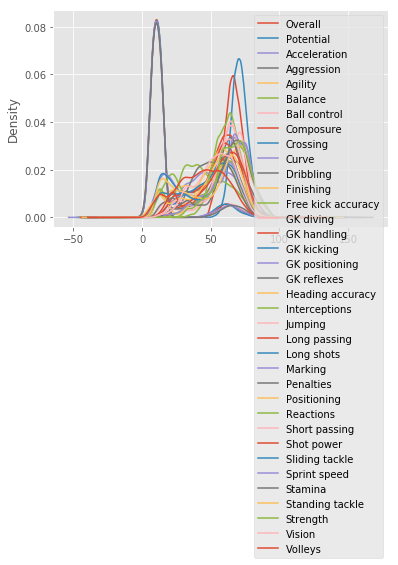

In [40]:
# density plot
feat.plot(kind='density', subplots=False, layout=(10,10), sharex=False)
plt.show()

In [41]:
#Scatter Matrix for correlation between features
# from pandas.plotting import scatter_matrix

#when 2 identical param age vs age, are matched against each other a scatter plot is displayed
# scatter_matrix(feat.apply(pd.to_numeric), diagonal='kde')

In [42]:
feat["Potential"].value_counts()

70    1230
72    1211
71    1175
69    1149
68    1109
73    1074
67    1071
74    1028
66     917
75     880
65     770
76     763
77     650
64     603
78     548
63     499
79     455
80     380
62     348
82     290
81     277
61     257
83     195
60     166
84     151
59     131
85     130
86      97
58      94
57      60
87      53
88      42
56      36
55      26
89      25
54      21
90      18
52      11
92      10
53       8
91       8
94       4
93       3
51       2
49       2
46       2
50       1
48       1
Name: Potential, dtype: int64

In [43]:
feat["Potential"] = pd.cut(feat.Potential, [-np.inf, 49, 59, 69, 79, 89, np.inf], labels=('E','D','C','B','A','S'))

In [44]:
feat["Potential"]

0        S
1        S
2        S
3        S
4        S
5        S
6        S
7        S
8        S
9        S
10       S
11       S
12       S
13       A
14       A
15       A
16       A
17       A
18       A
19       S
20       S
21       S
22       S
23       A
24       A
25       A
26       A
27       A
28       A
29       A
        ..
17951    D
17952    C
17953    C
17954    C
17955    C
17956    C
17957    C
17958    D
17959    C
17960    C
17961    B
17962    C
17963    D
17964    C
17965    C
17966    C
17967    C
17968    C
17969    C
17970    D
17971    C
17972    C
17973    D
17974    D
17975    E
17976    C
17977    E
17978    C
17979    C
17980    C
Name: Potential, Length: 17981, dtype: category
Categories (6, object): [E < D < C < B < A < S]

In [45]:
feat["Potential"].value_counts()

B    9014
C    6889
A    1640
D     390
S      43
E       5
Name: Potential, dtype: int64

In [46]:
#Removed goalkeeping attributes because every player shouldnt be judged on it
#Separate into feature set & target variable

#feature set
X = feat[['Overall', 'Acceleration', 'Aggression', 'Agility',
       'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']]

#target variable
Y = feat['Potential']

In [47]:
X.columns.tolist()

['Overall',
 'Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'Ball control',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Free kick accuracy',
 'Heading accuracy',
 'Interceptions',
 'Jumping',
 'Long passing',
 'Long shots',
 'Marking',
 'Penalties',
 'Positioning',
 'Reactions',
 'Short passing',
 'Shot power',
 'Sliding tackle',
 'Sprint speed',
 'Stamina',
 'Standing tackle',
 'Strength',
 'Vision',
 'Volleys']

In [48]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %d",fit.n_features_)
print("Selected Features: %s",fit.support_)
print("Feature Ranking: %s",fit.ranking_)

Num Features: %d 5
Selected Features: %s [ True False  True False False False  True False False False False False
 False False False False False  True False False False False False False
 False False  True False False False]
Feature Ranking: %s [ 1  5  1 23  4  3  1 16 17  6 20  9  2 14 11 12 19  1 22 25 21 15 10 24
 13 26  1  7  8 18]


In [49]:
print(X.columns[0], X.columns[2], X.columns[6], X.columns[17], X.columns[26])

Overall Aggression Composure Marking Standing tackle


In [50]:
# The above feature extraction method was very time consuming and moreover the features that were extracted 
# seemed like an invalid criteria for the players to be rated at

In [51]:
# Show the feature information by printing the first five rows
print("\nFeature values:")
display(X.head())


Feature values:


,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,94,89,63,89,63,93,95,85,81,91,...,96,83,94,23,91,92,31,80,85,88
1,93,92,48,90,95,95,96,77,89,97,...,95,88,85,26,87,73,28,59,90,85
2,92,94,56,96,82,95,92,75,81,96,...,88,81,80,33,90,78,24,53,80,83
3,92,88,78,86,60,91,83,77,86,86,...,93,83,87,38,77,89,45,80,84,88
4,92,58,29,52,35,48,70,15,14,30,...,85,55,25,11,61,44,10,83,70,11


In [52]:
# Split into the Training set and Test set
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.2,
                                                    random_state = 2,
                                                    stratify = Y)

In [53]:
# Feature Scaling
# for scalling the featues to the same scale or range
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
# Applying PCA
from sklearn.decomposition import PCA

# feature extraction with 3 principal components
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# summarize components
# 3 principal components display little similarity to the main df X.
# Also when n_components = 5 xgboost performs less accurately than svm
print("Explained Variance: %s",pca.explained_variance_ratio_)
print(pca.components_)

Explained Variance: %s [0.5261444  0.16412721 0.07049404]
[[-0.13163564 -0.17674987 -0.15409248 -0.1859031  -0.15727563 -0.23983399
  -0.20445919 -0.22157099 -0.22121877 -0.23249248 -0.19940977 -0.20869895
  -0.16921157 -0.11868794 -0.0644993  -0.20782556 -0.22064406 -0.10628453
  -0.2011988  -0.22146523 -0.12963609 -0.23118611 -0.21857036 -0.10708408
  -0.17602056 -0.19838965 -0.11476744 -0.02954314 -0.19230154 -0.20790953]
 [ 0.08705995 -0.12108858  0.27540892 -0.1462685  -0.13225352 -0.02374485
   0.06519393 -0.01904924 -0.09176269 -0.09583433 -0.20820173 -0.06471317
   0.17292692  0.36682872  0.1343294   0.09929451 -0.11837176  0.37863253
  -0.12989173 -0.13739962  0.07780677  0.05077674 -0.05606227  0.37169934
  -0.09964405  0.11295008  0.37172278  0.24335124 -0.10968788 -0.15861335]
 [ 0.38064551 -0.28807678  0.03876416 -0.22503896 -0.34867719 -0.01338345
   0.17976936 -0.11537165  0.01365432 -0.07741821  0.11302025  0.05108401
   0.09909443 -0.10807013  0.01008393 -0.0102339   0

In [55]:
#Training & Evaluating models

from time import time 
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    
    # select and insert a pos_label = 'requiredlabel' for binary labels otherwise use average='weighted' or 'macro' 
    # otherwise use average='weighted' or 'macro' to account or not account for label imbalance  
    return f1_score(target, y_pred, average='weighted'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print(f1, acc)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [56]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
#Boosting refers to this general problem of producing a very accurate prediction rule 
#by combining rough and moderately inaccurate rules-of-thumb
clf_C = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print('')

print('The coeff and intercepts of logistic regression are')
print(clf_A.coef_)
print(clf_A.intercept_)

Training a LogisticRegression using a training set size of 14384. . .
Trained model in 0.1754 seconds
Made predictions in 0.0052 seconds.
0.4982428881696054 0.5408092324805339
F1 score and accuracy score for training set: 0.4982 , 0.5408.
Made predictions in 0.0010 seconds.
F1 score and accuracy score for test set: 0.5003 , 0.5435.

Training a SVC using a training set size of 14384. . .
Trained model in 14.9579 seconds
Made predictions in 7.2973 seconds.
0.6203899690995143 0.6348025583982202
F1 score and accuracy score for training set: 0.6204 , 0.6348.
Made predictions in 1.8250 seconds.
F1 score and accuracy score for test set: 0.6005 , 0.6180.

Training a XGBClassifier using a training set size of 14384. . .
Trained model in 5.4602 seconds
Made predictions in 0.3982 seconds.
0.6203685426670884 0.6340378197997776
F1 score and accuracy score for training set: 0.6204 , 0.6340.
Made predictions in 0.1193 seconds.
F1 score and accuracy score for test set: 0.5951 , 0.6108.

The coeff and 

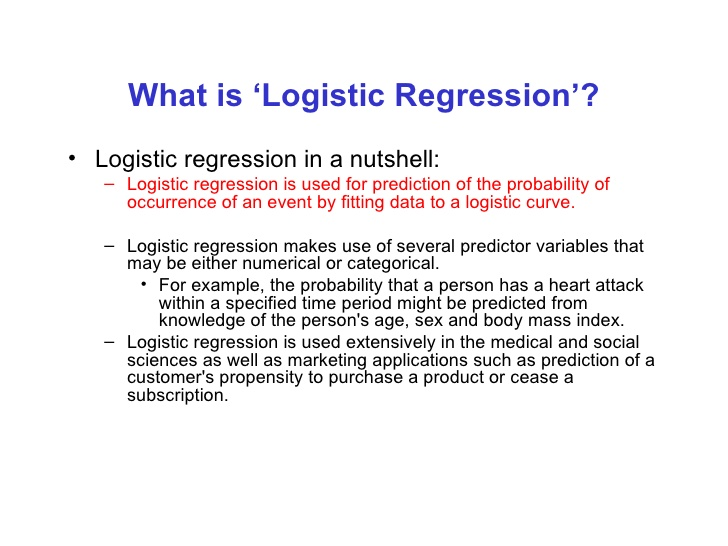

In [57]:
from IPython.display import Image
Image(filename="C:/Users/prono/Desktop/images/1.jpg")

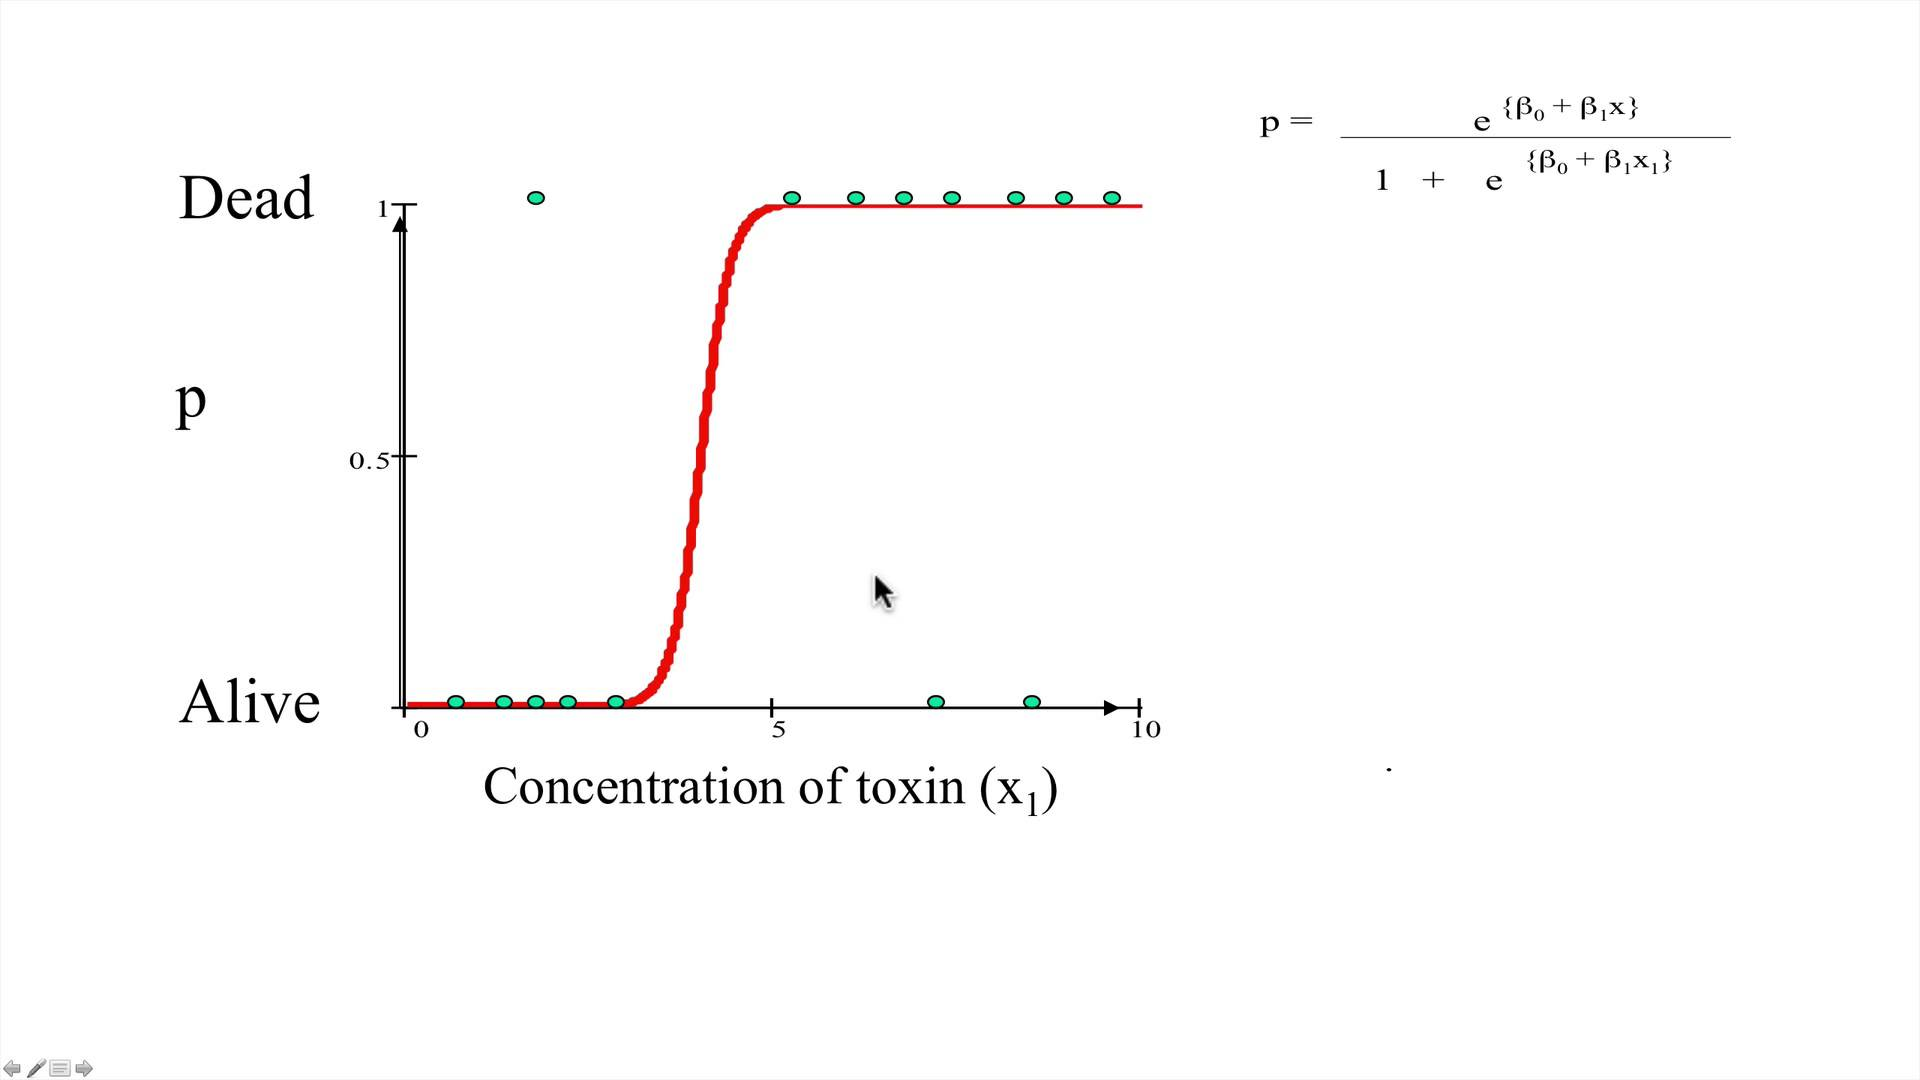

In [58]:
Image(filename="C:/Users/prono/Desktop/images/2.jpg")

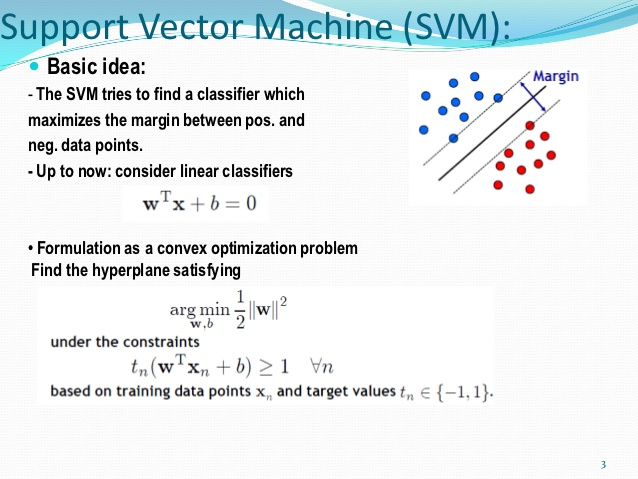

In [59]:
Image(filename="C:/Users/prono/Desktop/images/3.jpg")

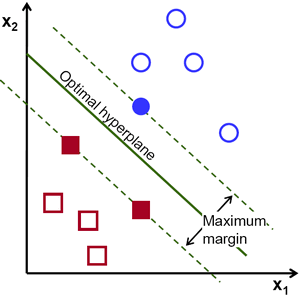

In [60]:
Image(filename="C:/Users/prono/Desktop/images/4.png")

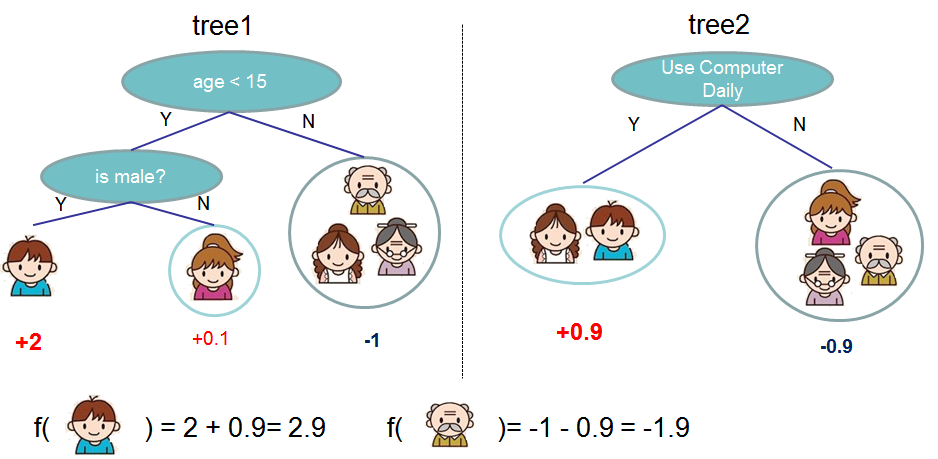

In [61]:
Image(filename="C:/Users/prono/Desktop/images/5.png")

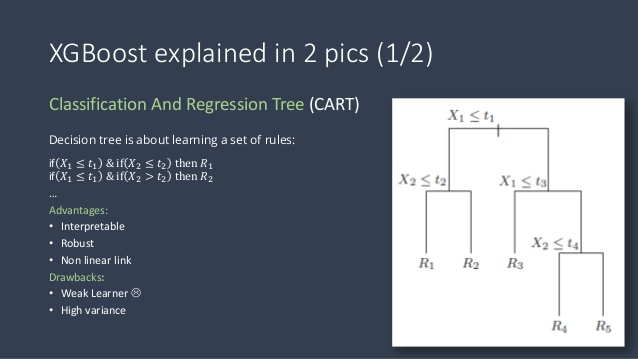

In [62]:
Image(filename="C:/Users/prono/Desktop/images/6.jpg")

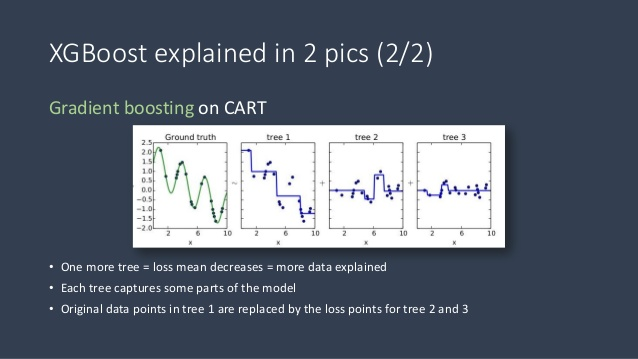

In [63]:
Image(filename="C:/Users/prono/Desktop/images/7.jpg")

In [64]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


# Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

# Initialize the classifier
clf = xgb.XGBClassifier(seed=2)

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, average="weighted")

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print(clf)

# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, X_train, y_train)
print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
f1, acc = predict_labels(clf, X_test, y_test)
print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=3, missing=None,
       n_estimators=40, n_jobs=1, nthread=None, objective='multi:softprob',
       random_state=0, reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1,
       seed=2, silent=True, subsample=0.8)
Made predictions in 0.1703 seconds.
F1 score and accuracy score for training set: 0.5933 , 0.6095.
Made predictions in 0.0253 seconds.
F1 score and accuracy score for test set: 0.5764 , 0.5958.


In [65]:
#prediction
clf.predict(X_test)

array(['C', 'B', 'C', ..., 'C', 'C', 'C'], dtype=object)

In [66]:
#Kmeans clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
 
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report

%matplotlib inline

In [67]:
display(feat.head(5))

,Overall,Potential,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,94,S,89,63,89,63,93,95,85,81,...,96,83,94,23,91,92,31,80,85,88
1,93,S,92,48,90,95,95,96,77,89,...,95,88,85,26,87,73,28,59,90,85
2,92,S,94,56,96,82,95,92,75,81,...,88,81,80,33,90,78,24,53,80,83
3,92,S,88,78,86,60,91,83,77,86,...,93,83,87,38,77,89,45,80,84,88
4,92,S,58,29,52,35,48,70,15,14,...,85,55,25,11,61,44,10,83,70,11


In [68]:
#Building & running kmeans model
km = KMeans(n_clusters = 3, random_state = 0)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [69]:
#Prediction
km.labels_

array([2, 2, 2, ..., 2, 0, 1])

In [70]:
km.predict(X)

array([2, 2, 2, ..., 2, 0, 1])

In [71]:
km.cluster_centers_

array([[66.41843339, 64.42222718, 66.25396117, 62.15967418, 63.62742691,
        60.1815443 , 59.91508592, 52.72662352, 46.84177639, 55.37101094,
        39.49587146, 43.203526  , 59.42088819, 63.44320464, 67.81968311,
        57.40984155, 45.37893327, 62.53001562, 46.81042178, 47.72874358,
        62.46250837, 62.05054675, 55.74793573, 63.96261995, 64.9692033 ,
        69.48638697, 65.91307744, 69.28576211, 51.37056461, 39.61381388],
       [64.35426654, 39.23777565, 27.30057526, 40.77660594, 43.53116012,
        20.36097795, 36.72147651, 14.67833174, 15.09443912, 14.37008629,
        12.61409396, 14.82885906, 15.54554171, 18.41514861, 58.36433365,
        25.62176414, 13.35762224, 13.75311601, 20.71955896, 12.01390221,
        58.92521572, 27.09779482, 22.84372004, 15.16922339, 39.66970278,
        31.35618408, 15.33077661, 61.17976989, 35.92713327, 13.29530201],
       [66.59743257, 72.4797346 , 50.95225732, 71.66911871, 70.16919083,
        66.8152315 , 61.67546517, 56.56223857, 57

In [72]:
pd.crosstab(Y, km.labels_)

col_0,0,1,2
Potential,,,
E,4,1,0
D,167,114,109
C,3486,950,2453
B,4560,878,3576
A,739,137,764
S,5,6,32


In [73]:
# Unique category labels: 'S', 'A', 'B', 'C', 'D', 'E'
color_labels = Y.unique()
color_labels

[S, A, B, C, D, E]
Categories (6, object): [E < D < C < B < A < S]

In [74]:
#setting a color theme
color_theme = np.array(['darkgrey','lightsalmon','powderblue','#9b59b6','#34495e', '#2ecc71'])
#mapping the values
color_map = dict(zip(color_labels, color_theme))

In [76]:
Y.value_counts()

B    9014
C    6889
A    1640
D     390
S      43
E       5
Name: Potential, dtype: int64

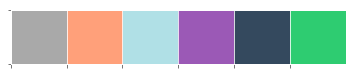

In [75]:
sns.set_palette(color_theme)
sns.palplot(sns.color_palette())

In [77]:
color_map

{'A': 'lightsalmon',
 'B': 'powderblue',
 'C': '#9b59b6',
 'D': '#34495e',
 'E': '#2ecc71',
 'S': 'darkgrey'}

Text(0.5,1,'Kmean clustering clf')

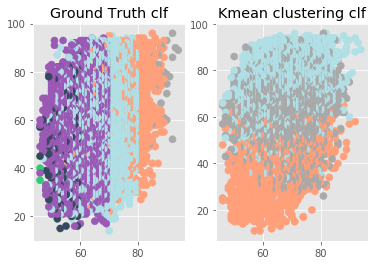

In [78]:
plt.subplot(1,2,1)
plt.scatter(x=X.Overall, y=X.Agility, c=Y.map(color_map), s=50)
plt.title('Ground Truth clf')

plt.subplot(1,2,2)
plt.scatter(x=X.Overall, y=X.Acceleration, c=color_theme[km.labels_], s=50)
plt.title('Kmean clustering clf')

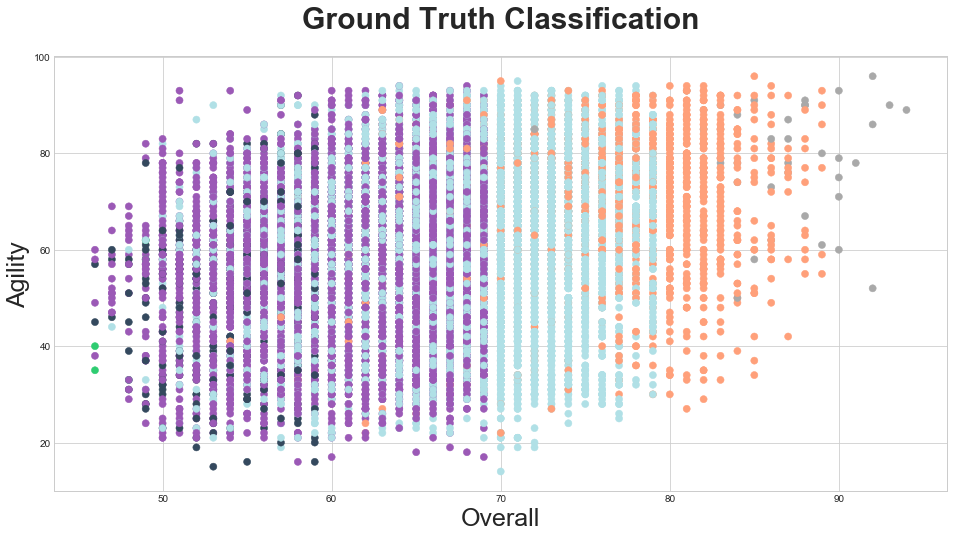

In [79]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Ground Truth Classification', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Overall', fontsize=25)
plt.ylabel('Agility', fontsize=25)
plt.scatter(x=X.Overall, y=X.Agility, c=Y.map(color_map), s=50)
plt.show()

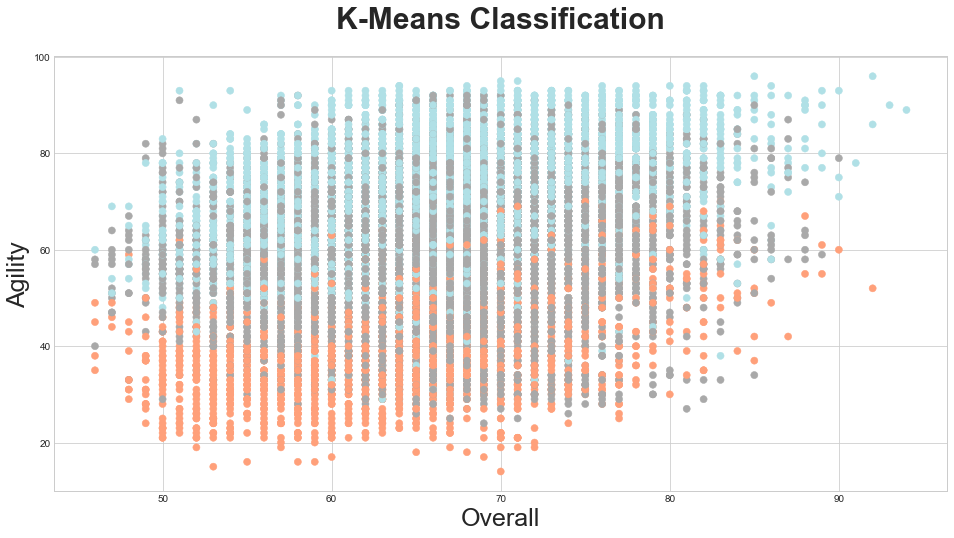

In [80]:
#Plotting kmeans model outputs
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('K-Means Classification', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Overall', fontsize=25)
plt.ylabel('Agility', fontsize=25)
plt.scatter(x=X.Overall, y=X.Agility, c=color_theme[km.labels_], s=50)
plt.show()

In [81]:
import keras
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

Using TensorFlow backend.


In [82]:
#feature set
X = feat[['Overall', 'Acceleration', 'Aggression', 'Agility',
       'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']]

#target variable
Y = feat['Potential']

In [83]:
Y.describe()

count     17981
unique        6
top           B
freq       9014
Name: Potential, dtype: object

In [84]:
# creates a dummy integer value for the label
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
Y1 = encoder.fit_transform(Y)

y = pd.get_dummies(Y1).values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [85]:
# create model
model = Sequential()
model.add(Dense(30,input_shape=(30,),activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [86]:
# Compile model
model.compile(Adam(lr=0.001),'categorical_crossentropy',metrics=['accuracy'])

In [87]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 66        
Total params: 1,621
Trainable params: 1,621
Non-trainable params: 0
_________________________________________________________________


In [94]:
#fitting the model and predicting 
model.fit(X_train,y_train,epochs=100)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
14384/14384 [==============================] - 5s 335us/step - loss: 0.7146 - acc: 0.6782
Epoch 2/100
14384/14384 [==============================] - 1s 57us/step - loss: 0.7079 - acc: 0.6817
Epoch 3/100
14384/14384 [==============================] - 1s 48us/step - loss: 0.7099 - acc: 0.6784
Epoch 4/100
14384/14384 [==============================] - 1s 65us/step - loss: 0.7065 - acc: 0.6842
Epoch 5/100
14384/14384 [==============================] - 1s 48us/step - loss: 0.7042 - acc: 0.6808
Epoch 6/100
14384/14384 [==============================] - 1s 46us/step - loss: 0.7041 - acc: 0.6805
Epoch 7/100
14384/14384 [==============================] - 1s 46us/step - loss: 0.7060 - acc: 0.6859
Epoch 8/100
14384/14384 [==============================] - 1s 54us/step - loss: 0.7061 - acc: 0.6746
Epoch 9/100
14384/14384 [==============================] - 1s 52us/step - loss: 0.7056 - acc: 0.6819
Epoch 10/100
14384/14384 [==============================] - 1s 49us/step - loss: 0.7049 - 

14384/14384 [==============================] - 1s 53us/step - loss: 0.6900 - acc: 0.6872
Epoch 82/100
14384/14384 [==============================] - 1s 55us/step - loss: 0.6816 - acc: 0.6867
Epoch 83/100
14384/14384 [==============================] - 1s 45us/step - loss: 0.6856 - acc: 0.6876
Epoch 84/100
14384/14384 [==============================] - 1s 47us/step - loss: 0.6875 - acc: 0.6875
Epoch 85/100
14384/14384 [==============================] - 1s 45us/step - loss: 0.6820 - acc: 0.6869
Epoch 86/100
14384/14384 [==============================] - 1s 44us/step - loss: 0.6804 - acc: 0.6874
Epoch 87/100
14384/14384 [==============================] - 1s 49us/step - loss: 0.6752 - acc: 0.6910
Epoch 88/100
14384/14384 [==============================] - 1s 45us/step - loss: 0.6768 - acc: 0.6902
Epoch 89/100
14384/14384 [==============================] - 1s 45us/step - loss: 0.6736 - acc: 0.6926
Epoch 90/100
14384/14384 [==============================] - 1s 45us/step - loss: 0.6726 - acc: 

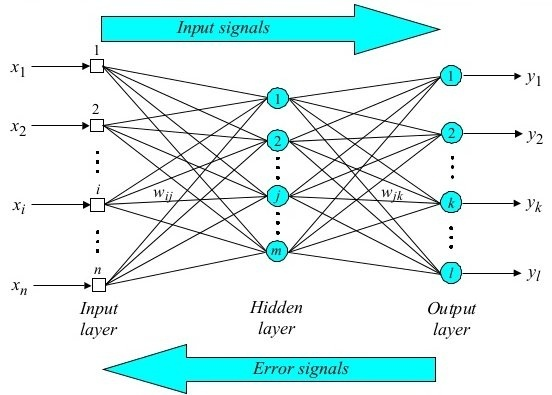

In [89]:
Image(filename="C:/Users/prono/Desktop/images/8.jpg")

In [90]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       0.63      0.50      0.56       339
          1       0.64      0.80      0.71      1788
          2       0.68      0.52      0.59      1387
          3       0.00      0.00      0.00        71
          4       0.00      0.00      0.00         1
          5       0.00      0.00      0.00        11

avg / total       0.64      0.65      0.63      3597

[[ 170  162    7    0    0    0]
 [  87 1437  264    0    0    0]
 [   0  659  727    1    0    0]
 [   0    1   70    0    0    0]
 [   0    0    1    0    0    0]
 [  11    0    0    0    0    0]]


In [91]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

3597/3597 [==============================] - 0s 50us/step

acc: 64.89%


In [92]:
# when I changed the activation function from tanh to relu and learning rate from 0.4 to 0.001, 
# the network gave me great accuracy & increased from 49.71% (former) to 66.39% (recent)
# increasing epochs could help increase accuracy

In [93]:
model.predict(X_test)

array([[5.5246084e-04, 1.4157972e-01, 7.1639162e-01, 1.4002958e-01,
        1.4392444e-03, 7.3335468e-06],
       [1.2747030e-01, 8.0971736e-01, 6.0460463e-02, 2.5229279e-05,
        7.0787296e-09, 2.3266887e-03],
       [1.9172776e-02, 6.2887663e-01, 3.5023502e-01, 1.4742143e-03,
        4.2448660e-06, 2.3705685e-04],
       ...,
       [7.9819418e-02, 8.1114173e-01, 1.0764852e-01, 8.7044704e-05,
        4.7559318e-08, 1.3032268e-03],
       [1.9764726e-03, 2.6685321e-01, 6.9235504e-01, 3.8494755e-02,
        2.9579943e-04, 2.4755163e-05],
       [1.2921993e-01, 8.0903959e-01, 5.9349377e-02, 2.4266208e-05,
        6.6702133e-09, 2.3667368e-03]], dtype=float32)

In [1]:
exit